In [1]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import os
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [2]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed/QC2'
os.chdir(os.path.join(basepath, file_location))

In [3]:
df = pd.read_csv('NYBG_CO2_Flux_and_Temps.csv')
df.drop(22,axis=0,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
grouped = df.groupby('Collar')

In [8]:
bw_tp1 = grouped.get_group('BW_TP1')

In [16]:
bw_hl1 = grouped.get_group('BW_HL1')

In [6]:
df.head()

,Date,Chamber_Temp,Collar,CO2_Flux,Site,Type,Chamber Used,Temperature,Moisture
0,5/31/2022 8:13,31.95000,BW_TP1,33.04108,BW,TP,R,23.1,38.0
1,5/31/2022 8:17,31.07364,BW_TP2,21.48947,BW,TP,R,23.4,38.0
2,5/31/2022 8:22,32.25500,BW_TP3,15.38946,BW,TP,R,23.6,51.1
3,5/31/2022 8:55,30.45091,BR_HL3,22.07139,BR,HL,R,22.3,47.1
4,5/31/2022 9:49,33.74273,BW_HL1,24.25844,BW,HL,R,23.0,32.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          175 non-null    object 
 1   Chamber_Temp  175 non-null    float64
 2   Collar        175 non-null    object 
 3   CO2_Flux      175 non-null    float64
 4   Site          175 non-null    object 
 5   Type          175 non-null    object 
 6   Chamber Used  175 non-null    object 
 7   Temperature   171 non-null    float64
 8   Moisture      172 non-null    float64
dtypes: float64(4), object(5)
memory usage: 13.7+ KB


In [75]:
def regression_soil_temp(group):
    y, X = dmatrices('CO2_Flux ~ Temperature', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Temperature'], result.fittedvalues, 'red')
    ax.set_title(f'Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}_soil_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [79]:
def regression_chamber_temp(group):
    y, X = dmatrices('CO2_Flux ~ Chamber_Temp', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Chamber_Temp'], result.fittedvalues, 'red')
    ax.set_title(f'Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}_chamber_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

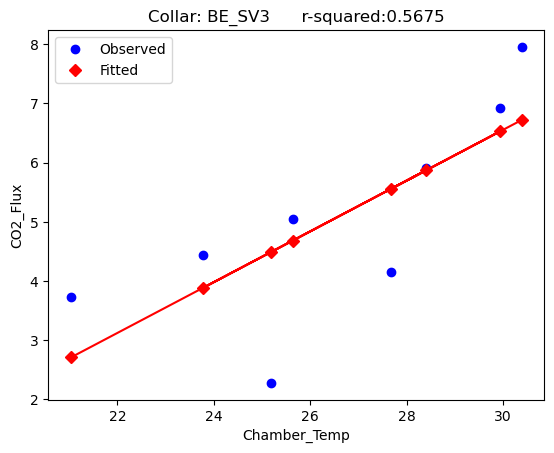

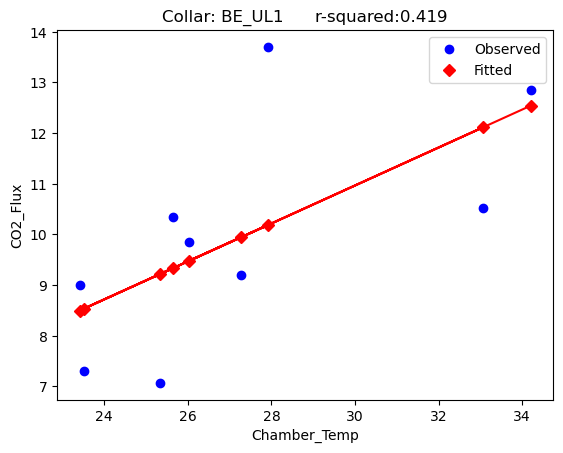

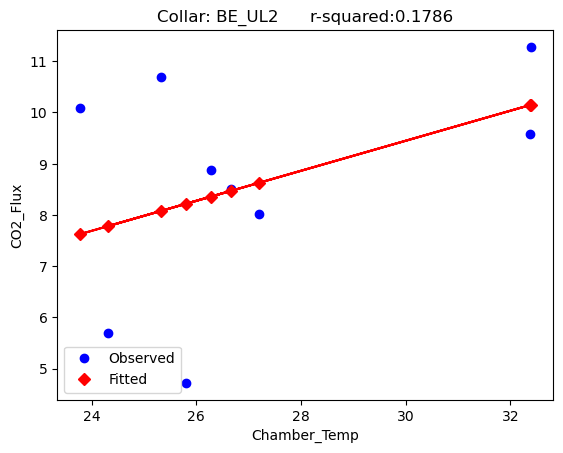

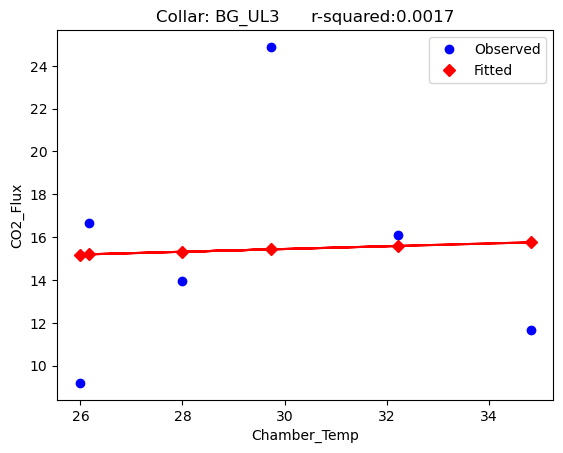

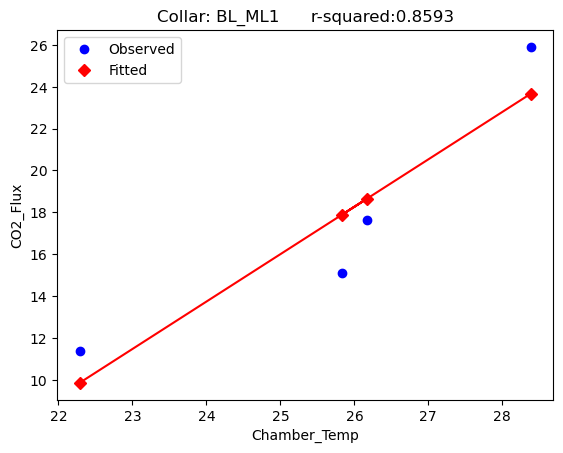

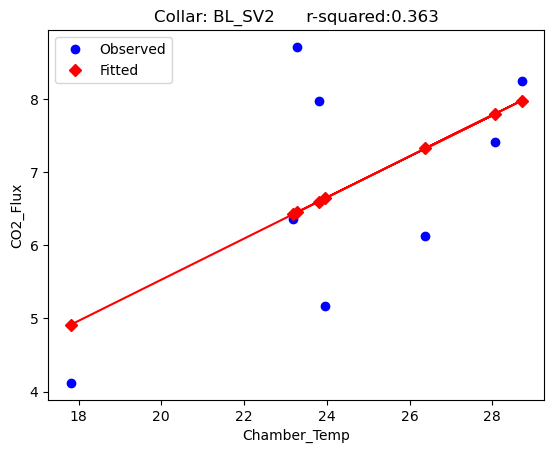

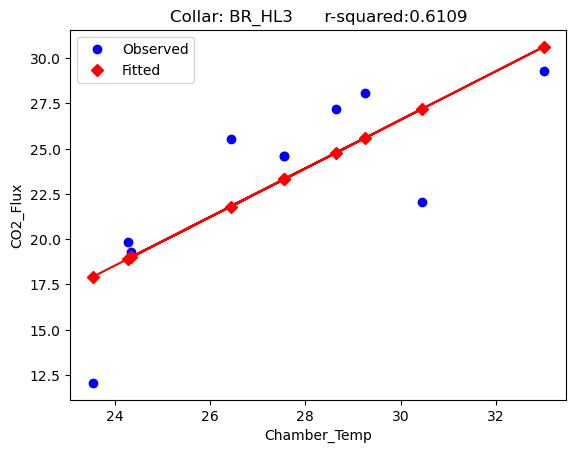

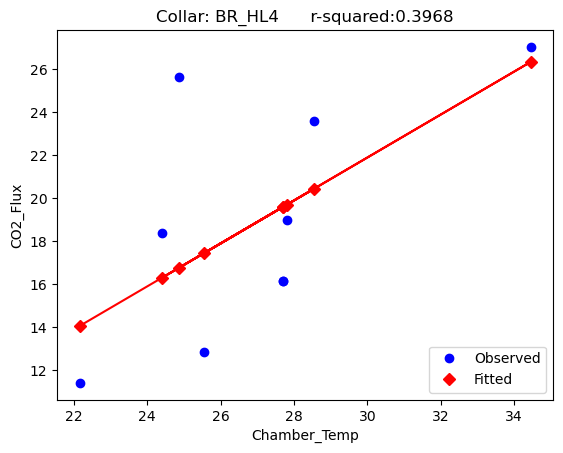

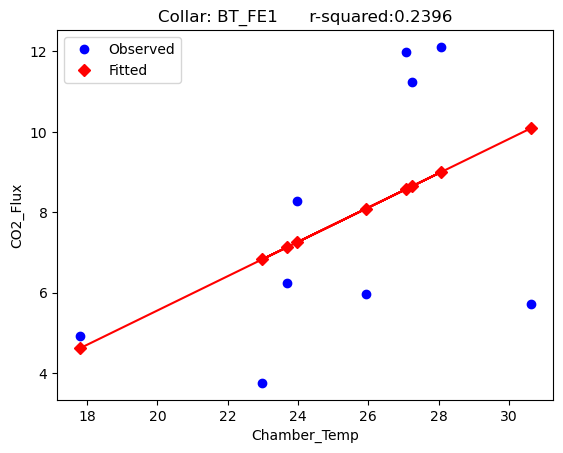

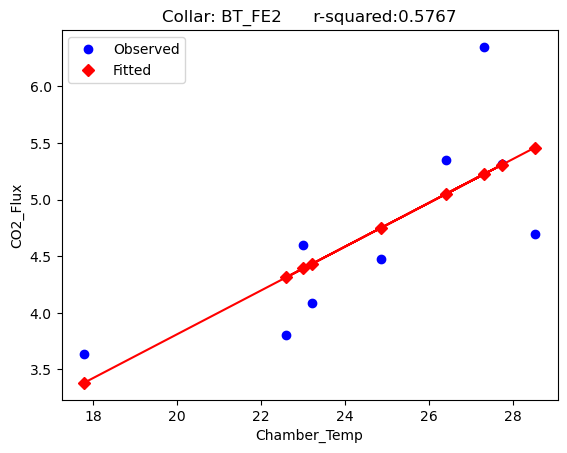

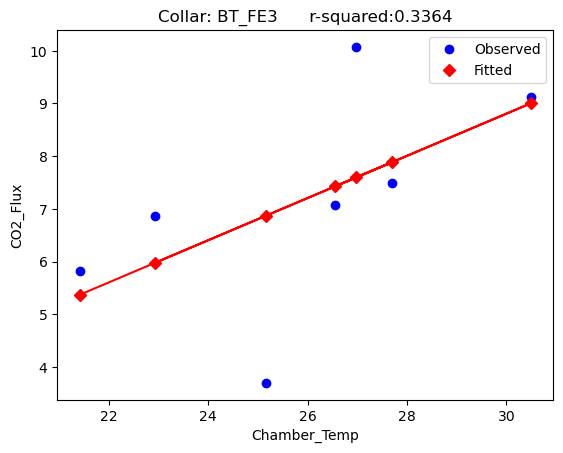

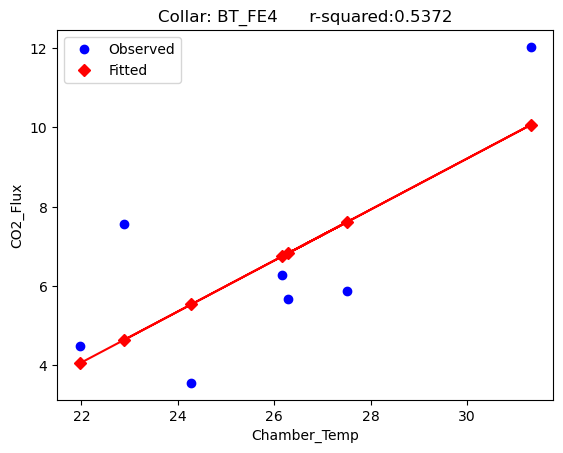

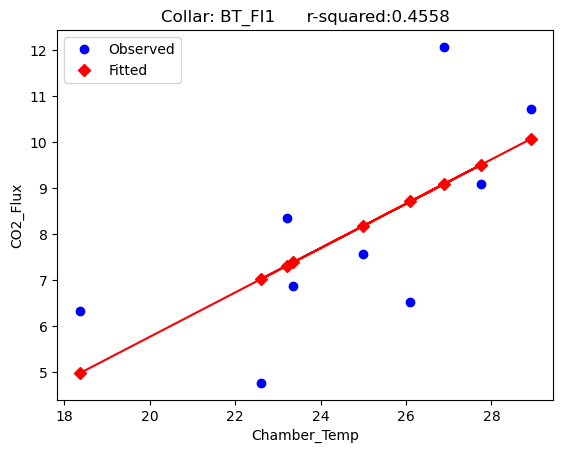

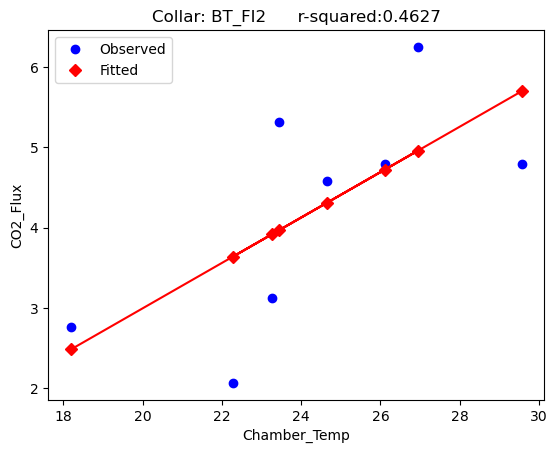

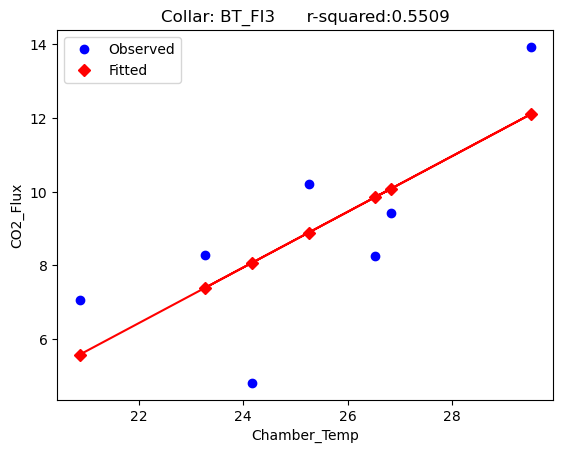

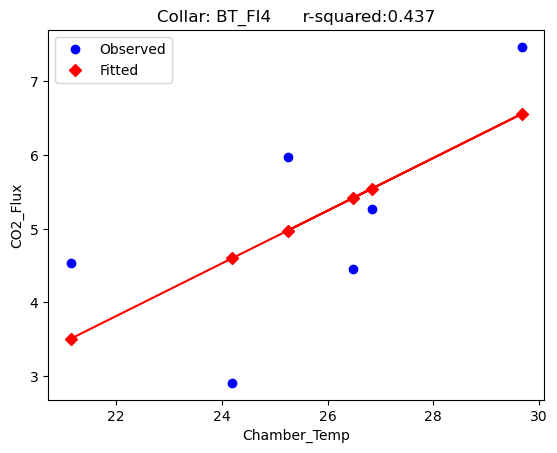

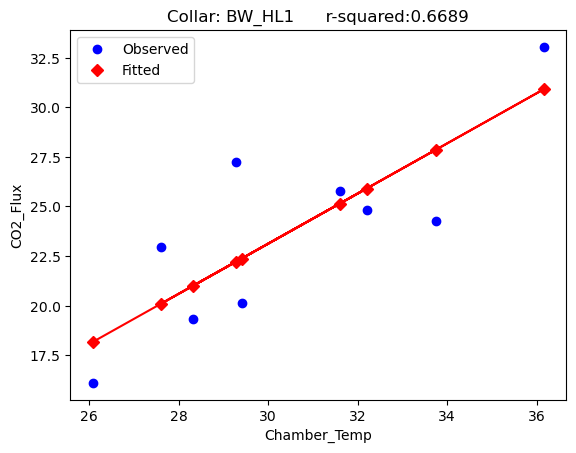

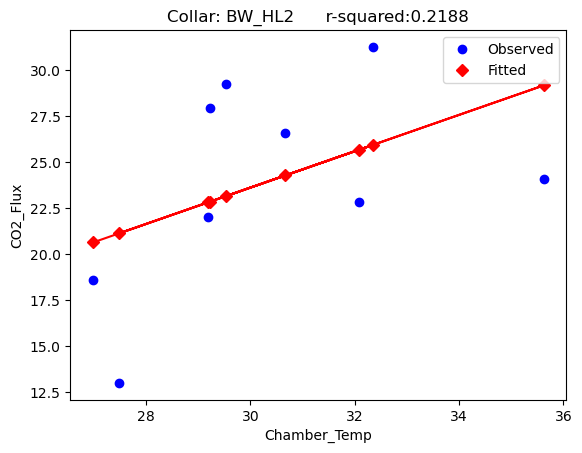

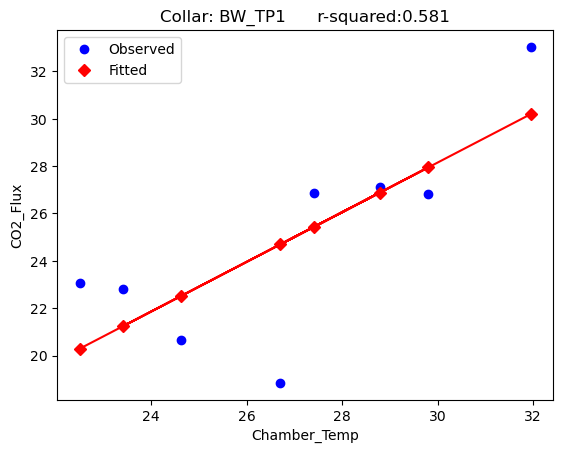

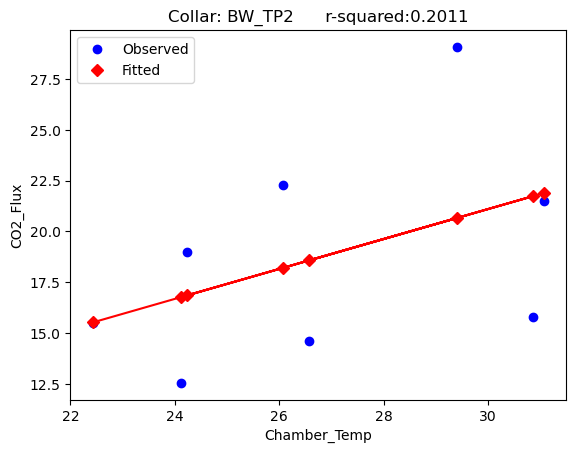

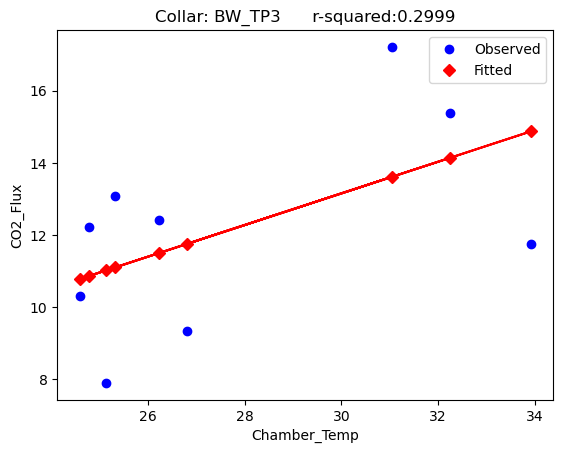

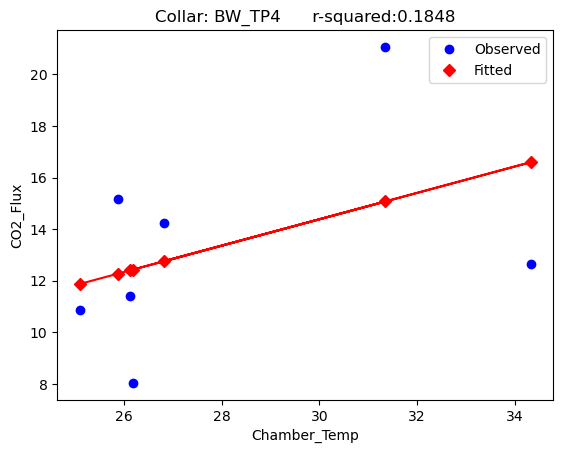

In [80]:
for group in grouped:
    regression_chamber_temp(group)

In [26]:
result = model.fit()

In [27]:
b_coef, m_coef = result.params
b_err, m_err = result.bse
print(f'Regression slope: m = {m_coef:.3f} +/- {m_err:.3f}')
print(f'Regression intercept: b = {b_coef:.3f} +/- {b_err:.3f}')
print(f'Regression R-squared: R^2 = {result.rsquared:.3f}')
print(f'Regression p-value: p(>|t|) = {result.pvalues[1]:.2e}')

Regression slope: m = 0.789 +/- 1.089
Regression intercept: b = 3.813 +/- 27.562
Regression R-squared: R^2 = 0.070
Regression p-value: p(>|t|) = 4.92e-01


In [30]:
def plot_regression(df, result):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.plot(df['Soil_Temp'],df['CO2_Flux'],'o')
    ax.plot(df['Soil_Temp'],result.fittedvalues, "r--.")

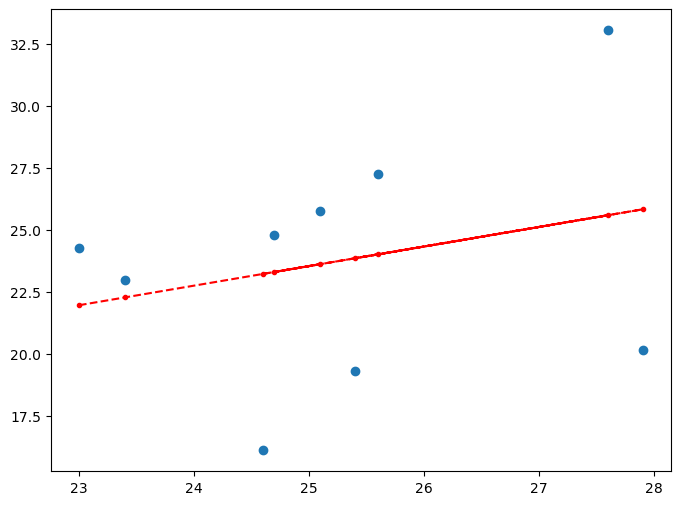

In [31]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(bw_hl1['Temperature'],bw_hl1['CO2_Flux'],'o')
ax.plot(bw_hl1['Temperature'],result.fittedvalues, "r--.")

plt.show()

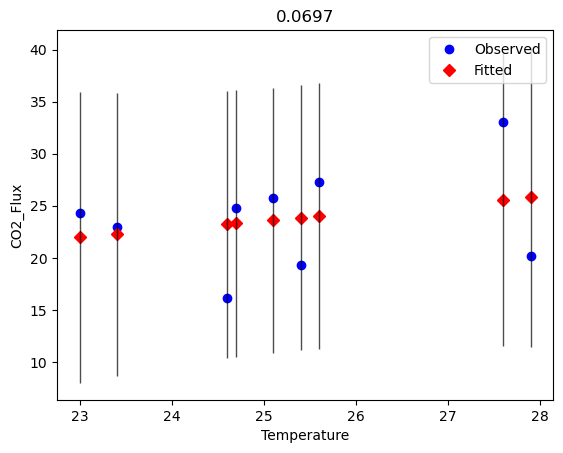

In [40]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result, 1, ax=ax)
ax.set_title(np.around(result.rsquared,4))
ax.legend(['Observed','Fitted'])
plt.show()

In [62]:
result.fittedvalues

4      21.962920
28     22.278564
52     23.620051
71     23.304407
93     24.014606
115    25.592825
135    23.856784
154    25.829558
174    23.225496
dtype: float64

In [63]:
X

,Intercept,Temperature
4,1.0,23.0
28,1.0,23.4
52,1.0,25.1
71,1.0,24.7
93,1.0,25.6
115,1.0,27.6
135,1.0,25.4
154,1.0,27.9
174,1.0,24.6
